In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import functions as fu
import rhos as rh
import test as test

## Separable State

In [8]:
# parameters

N = 3
D = 2  # è la dimensione di ciascun sottoinsieme; qui non ho la necessità 
        # di scrivere local_dim1 = ... perchè è uguale per tutti

seed = 12345

type = "separable"

In [9]:
# Initialization of the coefficients c_j for each subsystem

init_coeff = [
    np.array([1, 0]),  # Subsystem 1 (|0⟩)
    np.array([1/np.sqrt(2), 1/np.sqrt(2)]),  # Subsystem 2 (|0⟩ + |1⟩) / √2
    np.array([0, 1])   # Subsystem 3 (|1⟩)
]

# Case 1: i want to randomly initialize the coefficients
coefficients = fu.initialize_coefficients(N, D, seed, type, init_coeff, random_init=True)  # Use random initialization

# Case 2: i manually initialize the coefficients
# coefficients = fu.initialize_coefficients(N, D, seed, type, init_coeff, random_init=False)  # Use random initialization

In [10]:
# Calculate the separable state
separable_state = fu.create_state(N, D, coefficients, type)

print(f"Length of the separable pure state (N={N}, D={D}): \n \n {len(separable_state)}\n")
print(f"General state: \n \n {separable_state}\n")

Length of the separable pure state (N=3, D=2): 
 
 8

General state: 
 
 [-0.21261639+0.44249785j -0.3207483 +0.43348788j -0.09240641+0.37655275j
 -0.17744337+0.38716396j -0.14357266+0.13221409j -0.182193  +0.11299431j
 -0.08947495+0.12552013j -0.1224475 +0.11694263j]



In [11]:
print("Separable state:", separable_state)

Separable state: [-0.21261639+0.44249785j -0.3207483 +0.43348788j -0.09240641+0.37655275j
 -0.17744337+0.38716396j -0.14357266+0.13221409j -0.182193  +0.11299431j
 -0.08947495+0.12552013j -0.1224475 +0.11694263j]


## General State

In [12]:
# parameters

N = 3
D = 2  # è la dimensione di ciascun sottoinsieme; qui non ho la necessità 
        # di scrivere local_dim1 = ... perchè è uguale per tutti

seed = 12345
type = "general"

In [13]:
# Initialization of the coefficients

init_coeff = [
    1/np.sqrt(2), 0, 0, 1/2, 1/2, 0, 0, 0  
]

# Case 1: i want to randomly initialize the coefficients
coefficients = fu.initialize_coefficients(N, D, seed, type, init_coeff, random_init=True)  # Use random initialization

# Case 2: i manually initialize the coefficients
coefficients = fu.initialize_coefficients(N, D, seed, type, init_coeff, random_init=False)  # Use random initialization



In [14]:
# Calculate the separable state
general_state = fu.create_state(N, D, coefficients, type)

print(f"Length of the general pure state (N={N}, D={D}): \n \n {len(general_state)}\n")
print(f"Separable state: \n \n {general_state}\n")

Length of the general pure state (N=3, D=2): 
 
 8

Separable state: 
 
 [0.70710678+0.j 0.        +0.j 0.        +0.j 0.5       +0.j
 0.5       +0.j 0.        +0.j 0.        +0.j 0.        +0.j]



In [15]:
print("General state:", general_state)

General state: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.5       +0.j
 0.5       +0.j 0.        +0.j 0.        +0.j 0.        +0.j]


## Efficiency

#### Separable State

In [16]:
# parameters

N_max = 6
D_max = 30  # è la dimensione di ciascun sottoinsieme; qui non ho la necessità 
        # di scrivere local_dim1 = ... perchè è uguale per tutti

seed = 12345
type = "separable"

In [17]:
N_sizes, D_sizes, cpu_times_matrix_separable, bytes_matrix_separable = fu.comput_time(N_max, D_max, seed, type)

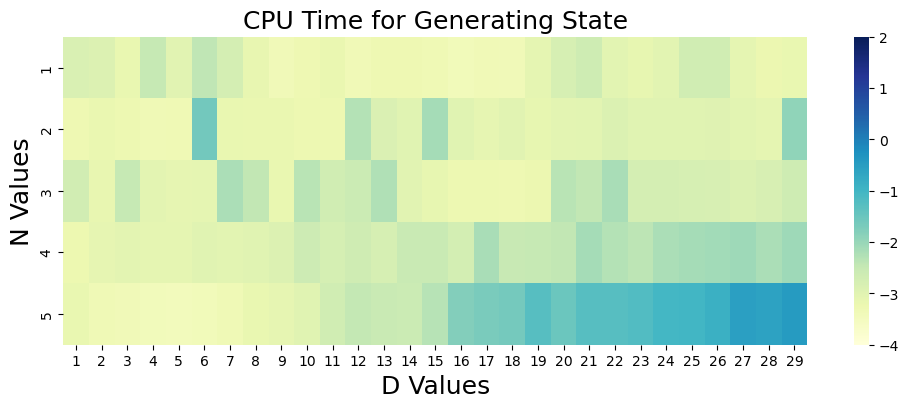

In [18]:
# Plot the heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(np.log10(cpu_times_matrix_separable), annot=False, vmin=-4, vmax=2, cmap="YlGnBu", 
            xticklabels=D_sizes, yticklabels=N_sizes)
plt.title("CPU Time for Generating State", fontsize=18)
plt.xlabel("D Values", fontsize=18)
plt.ylabel("N Values", fontsize=18)
plt.show()

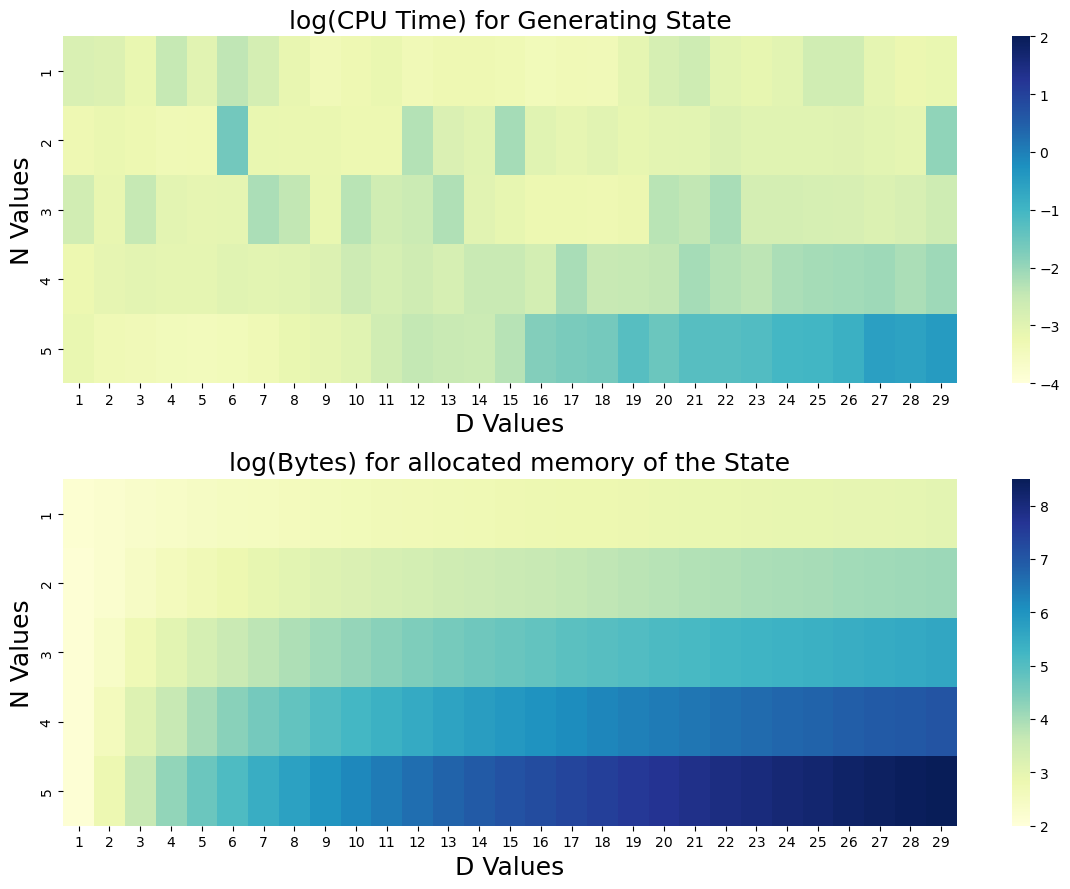

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(12, 9))

sns.heatmap(np.log10(cpu_times_matrix_separable), annot=False, vmin=-4, vmax=2, cmap="YlGnBu", 
            xticklabels=D_sizes, yticklabels=N_sizes, ax=axes[0])
axes[0].set_title("log(CPU Time) for Generating State", fontsize=18)
axes[0].set_xlabel("D Values", fontsize=18)
axes[0].set_ylabel("N Values", fontsize=18)

# Heatmap per il prodotto scalare degli autovettori
sns.heatmap(np.log10(bytes_matrix_separable), annot=False, vmin=2, vmax=8.5,  cmap="YlGnBu", 
            xticklabels=D_sizes, yticklabels=N_sizes, ax=axes[1])
axes[1].set_title("log(Bytes) for allocated memory of the State", fontsize=18)
axes[1].set_xlabel("D Values", fontsize=18)
axes[1].set_ylabel("N Values", fontsize=18)

plt.tight_layout()
plt.show()

#### General

In [20]:
# parameters

N_max = 5
D_max = 20  # è la dimensione di ciascun sottoinsieme; qui non ho la necessità 
        # di scrivere local_dim1 = ... perchè è uguale per tutti

seed = 12345

type = "general"

N_sizes, D_sizes, cpu_times_matrix_general, bytes_matrix_general = fu.comput_time(N_max, D_max, seed, type)

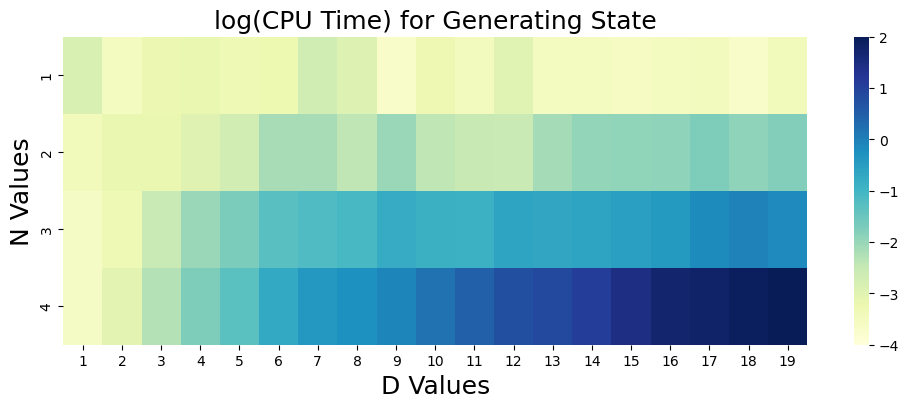

In [21]:
# Plot the heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(np.log10(cpu_times_matrix_general), annot=False, vmin=-4, vmax=2, cmap="YlGnBu", 
            xticklabels=D_sizes, yticklabels=N_sizes)
plt.title("log(CPU Time) for Generating State", fontsize=18)
plt.xlabel("D Values", fontsize=18)
plt.ylabel("N Values", fontsize=18)
plt.show()

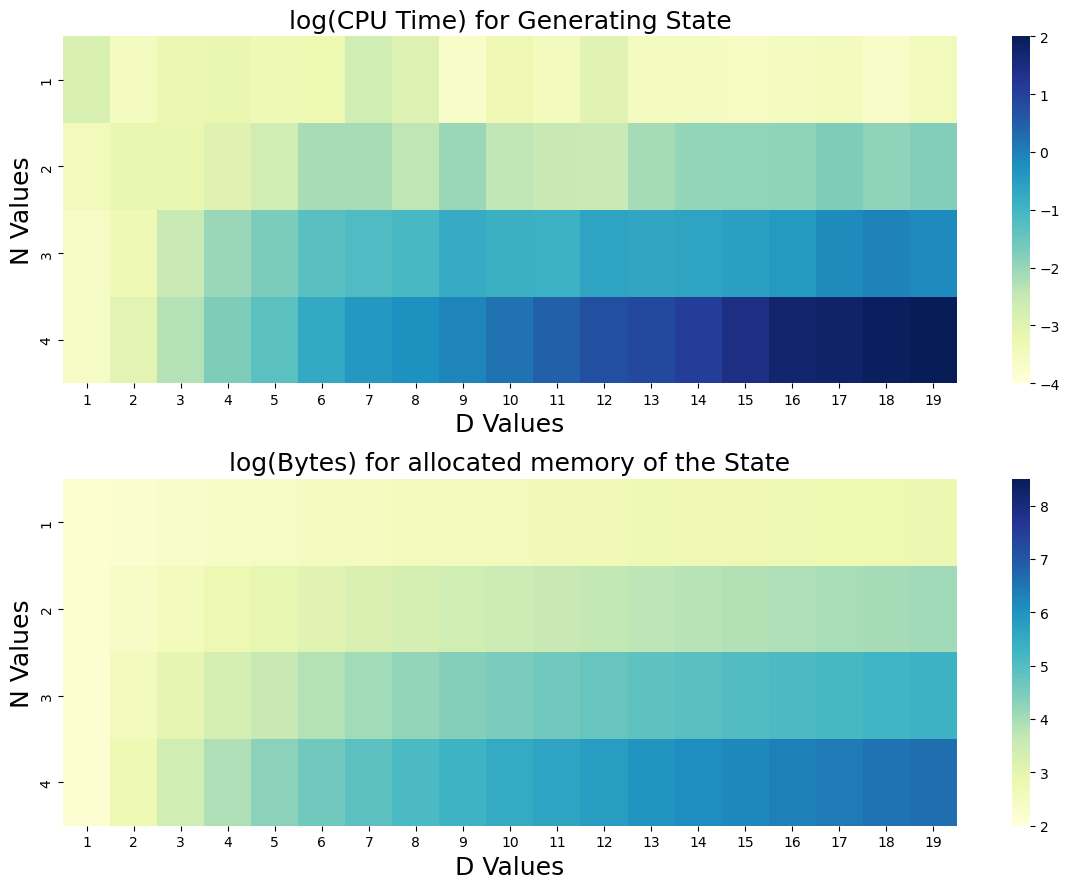

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(12, 9))

sns.heatmap(np.log10(cpu_times_matrix_general), annot=False, vmin=-4, vmax=2, cmap="YlGnBu", 
            xticklabels=D_sizes, yticklabels=N_sizes, ax=axes[0])
axes[0].set_title("log(CPU Time) for Generating State", fontsize=18)
axes[0].set_xlabel("D Values", fontsize=18)
axes[0].set_ylabel("N Values", fontsize=18)

# Heatmap per il prodotto scalare degli autovettori
sns.heatmap(np.log10(bytes_matrix_general), annot=False, vmin=2, vmax=8.5, cmap="YlGnBu", 
            xticklabels=D_sizes, yticklabels=N_sizes, ax=axes[1])
axes[1].set_title("log(Bytes) for allocated memory of the State", fontsize=18)
axes[1].set_xlabel("D Values", fontsize=18)
axes[1].set_ylabel("N Values", fontsize=18)

plt.tight_layout()
plt.show()

### Density Matrices

In [27]:
# parameters

N = 2   # 2 subsystems
D = 3   # QUTRITS
        # è la dimensione di ciascun sottoinsieme; qui non ho la necessità 
        # di scrivere local_dim1 = ... perchè è uguale per tutti

seed = 12345

In [28]:
type = "general"

coefficients_general = fu.initialize_coefficients(N, D, seed, type, random_init=True)  # Use random initialization

psi_general = fu.create_state(N, D, coefficients_general, type)

In [29]:
rho_general = rh.rho(psi_general)

In [30]:
print(f"Density matrix for a general state with N={N} and D={D}: \n\n {rho_general}\n")

Density matrix for a general state with N=2 and D=3: 

 [[0.17233821+0.j         0.10446897-0.06516891j 0.10666611-0.10322124j
  0.02611016+0.01680176j 0.07971851+0.03631304j 0.09993944+0.01488716j
  0.17691567+0.00269146j 0.15167019-0.043496j   0.1689863 -0.04288317j]
 [0.10446897+0.06516891j 0.08797092+0.j         0.10369212-0.02223594j
  0.0094741 +0.02005843j 0.03459262+0.05215764j 0.05495235+0.04681603j
  0.10622599+0.06853137j 0.10838812+0.03098673j 0.11865316+0.03790623j]
 [0.10666611+0.10322124j 0.10369212+0.02223594j 0.12784329+0.j
  0.00609714+0.02603777j 0.02759102+0.07022246j 0.05293939+0.06907248j
  0.10788722+0.10762873j 0.1199257 +0.06392103j 0.13027619+0.07467174j]
 [0.02611016-0.01680176j 0.0094741 -0.02005843j 0.00609714-0.02603777j
  0.00559388+0.j         0.01561805-0.00227038j 0.01659275-0.00748791j
  0.02706607-0.01684026j 0.01873829-0.02137665j 0.02142152-0.02297201j]
 [0.07971851-0.03631304j 0.03459262-0.05215764j 0.02759102-0.07022246j
  0.01561805+0.00227038j 

In [31]:
print("General state case", '\n')

keep_indices = [0]  # Keep the first site
rdm_left = rh.get_reduced_density_matrix(psi_general, D, N, keep_indices, print_rho=True)

print('\n', '\n')

# Compute the reduced density matrix for the second site (trace out the first site)
keep_indices = [1]  # Keep the second site
rdm_right = rh.get_reduced_density_matrix(psi_general, D, N, keep_indices, print_rho=True)


General state case 

Reordered psi_tensor shape: (3, 3)
----------------------------------------------------
DENSITY MATRIX TRACING SITES ([1])
----------------------------------------------------
[[0.38815242-2.21961016e-18j 0.11364217+1.38031883e-01j
  0.41557998+1.08349931e-01j]
 [0.11364217-1.38031883e-01j 0.10936191-2.50453790e-18j
  0.18235047-1.08384021e-01j]
 [0.41557998-1.08349931e-01j 0.18235047+1.08384021e-01j
  0.50248566-1.96564099e-18j]]

 

Reordered psi_tensor shape: (3, 3)
----------------------------------------------------
DENSITY MATRIX TRACING SITES ([0])
----------------------------------------------------
[[0.35958884-7.77577452e-18j 0.27510641-1.14459253e-01j
  0.29606387-1.57370447e-01j]
 [0.27510641+1.14459253e-01j 0.27695644-7.70721790e-19j
  0.31260139-3.14979227e-02j]
 [0.29606387+1.57370447e-01j 0.31260139+3.14979227e-02j
  0.36345473-1.96564099e-18j]]


In [32]:
type = "separable"

coefficients_separable = fu.initialize_coefficients(N, D, seed, type, random_init=True)  # Use random initialization

psi_separable = fu.create_state(N, D, coefficients_separable, type)

rho_separable = rh.rho(psi_separable)

In [33]:
print(f"Density matrix for a general state with N={N} and D={D}: \n\n {rho_separable}\n")

Density matrix for a general state with N=2 and D=3: 

 [[0.18712137+0.j         0.15420877-0.04056675j 0.18617995-0.06034065j
  0.08472669-0.09563278j 0.0490916 -0.09718024j 0.05346192-0.12247329j
  0.06047132-0.10656992j 0.02673138-0.10093524j 0.0258017 -0.12553382j]
 [0.15420877+0.04056675j 0.13587975+0.j         0.16651441-0.00936473j
  0.09055678-0.0604438j  0.061525  -0.06944454j 0.07061   -0.08934136j
  0.07293877-0.07471563j 0.04391176-0.07738664j 0.04847841-0.09786015j]
 [0.18617995+0.06034065j 0.16651441+0.00936473j 0.20470119+0.j
  0.11513893-0.06783j    0.08018213-0.08086085j 0.09268666-0.10461736j
  0.09453247-0.08653369j 0.05914528-0.09180741j 0.06615252-0.11658203j]
 [0.08472669+0.09563278j 0.09055678+0.0604438j  0.11513893+0.06783j
  0.08723878+0.j         0.07189443-0.01891282j 0.08679988-0.02813171j
  0.08184587-0.01734851j 0.06368903-0.03204077j 0.07583976-0.0436539j ]
 [0.0490916 +0.09718024j 0.061525  +0.06944454j 0.08018213+0.08086085j
  0.07189443+0.01891282j 0.0

In [34]:
print("Separable state case", '\n')

keep_indices = [0]  # Keep the first site
rdm_left = rh.get_reduced_density_matrix(psi_separable, D, N, keep_indices, print_rho=True)

print('\n', '\n')

# Compute the reduced density matrix for the second site (trace out the first site)
keep_indices = [1]  # Keep the second site
rdm_right = rh.get_reduced_density_matrix(psi_separable, D, N, keep_indices, print_rho=True)


Separable state case 

Reordered psi_tensor shape: (3, 3)
----------------------------------------------------
DENSITY MATRIX TRACING SITES ([1])
----------------------------------------------------
[[0.52770231+1.09662000e-17j 0.23893834-2.69694679e-01j
  0.1705356 -3.00538584e-01j]
 [0.23893834+2.69694679e-01j 0.24602271-2.22690688e-18j
  0.23081413-4.89246438e-02j]
 [0.1705356 +3.00538584e-01j 0.23081413+4.89246438e-02j
  0.22627498+2.61017438e-18j]]

 

Reordered psi_tensor shape: (3, 3)
----------------------------------------------------
DENSITY MATRIX TRACING SITES ([0])
----------------------------------------------------
[[0.35459646+3.41061312e-18j 0.29222682-7.68742997e-02j
  0.35281246-1.14345995e-01j]
 [0.29222682+7.68742997e-02j 0.25749319-3.70125964e-18j
  0.3155461 -1.77462455e-02j]
 [0.35281246+1.14345995e-01j 0.3155461 +1.77462455e-02j
  0.38791035-4.32871952e-18j]]


## Test

In [35]:
test.test_separable_state_simple()
test.test_separable_state_combination()
test.test_general_state_bell()
test.test_general_state_single_nonzero()
test.test_separable_state_equal_superposition()

### TEST: Separable State Simple ###
Test passed.
Test passed.
Reordered psi_tensor shape: (2, 2)
Reordered psi_tensor shape: (2, 2)
Test passed.
Test passed.
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

 

### TEST: Separable State Combination ###
Test passed.
Test passed.
Reordered psi_tensor shape: (2, 2)
Reordered psi_tensor shape: (2, 2)
Test passed.
Test passed.
[[0.5 0.5 0.  0. ]
 [0.5 0.5 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]

 

### TEST: General State Bell ###
Test passed.
Test passed.
Reordered psi_tensor shape: (2, 2)
Reordered psi_tensor shape: (2, 2)
Test passed.
Test passed.
[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]

 

### TEST: General State Single Non-Zero Component ###
Test passed.
Test passed.
Reordered psi_tensor shape: (2, 2)
Reordered psi_tensor shape: (2, 2)
Test passed.
Test passed.
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0